# DATA Club - Cartoon Image Classification Project with Fine Tuning
#### **Group members: Colin Chu, Le Fan Fang, Yuandi Tang, Rongjia Sun, Andre Barle**

This project will focus on image classification using machine learning and computer vision techniques. Specifically, it will involve developing a classifier to identify characters from the “Tom and Jerry” cartoon series. The dataset includes images of Tom, Jerry, and other characters, providing an opportunity to explore CNNs (Convolutional Neural Networks) and advanced image processing methods.

The objective of this project is to build a robust image classification model that can accurately identify characters from “Tom and Jerry” images. This will be an excellent use case for convolutional neural networks (CNNs), which are highly effective in image recognition tasks. The model’s performance will be evaluated based on its accuracy, precision, and ability to generalize across unseen test images.



### Preprocessing
In this stage we will import the data, perform data exploration and transformation, then ensure the data is ready to use for CNN and FCNN.

In [ ]:
# importing dependencies
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
import tensorflow.keras.optimizers as optim
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATA Club - Cartoon Classification Project/ground_truth.csv')

In [ ]:
df.head(20)

,filename,tom,jerry
0,frame0.jpg,0,0
1,frame1.jpg,0,0
2,frame2.jpg,0,0
3,frame3.jpg,0,0
4,frame4.jpg,0,0
5,frame5.jpg,0,0
6,frame6.jpg,0,0
7,frame7.jpg,0,0
8,frame8.jpg,0,0
9,frame9.jpg,0,0


In [ ]:
df.shape

(5478, 3)

In [ ]:
df = df.drop_duplicates() # drop duplicates

In [ ]:
print(df.tom.value_counts()) # show values for tom
print(df.jerry.value_counts()) # show values for jerry
print(df.isnull().sum()) # show null values

tom
0    2768
1    2710
Name: count, dtype: int64
jerry
0    3458
1    2020
Name: count, dtype: int64
filename    0
tom         0
jerry       0
dtype: int64


In [ ]:
df['tom_jerry_0'] = [1 if i == 0 and j == 0 else 0 for i, j in zip(df['tom'], df['jerry'])]
df['tom_jerry_1'] = [1 if i == 1 and j == 1 else 0 for i, j in zip(df['tom'], df['jerry'])]

In [ ]:
df['tom_placeholder'] = [1 if i == 1 and j == 0 else 0 for i, j in zip(df['tom'], df['jerry'])]
df['jerry'] = [1 if i == 0 and j == 1 else 0 for i, j in zip(df['tom'], df['jerry'])]
df['tom'] = df['tom_placeholder']
df = df.drop(columns='tom_placeholder')

In [ ]:
df.head(20)

,filename,tom,jerry,tom_jerry_0,tom_jerry_1
0,frame0.jpg,0,0,1,0
1,frame1.jpg,0,0,1,0
2,frame2.jpg,0,0,1,0
3,frame3.jpg,0,0,1,0
4,frame4.jpg,0,0,1,0
5,frame5.jpg,0,0,1,0
6,frame6.jpg,0,0,1,0
7,frame7.jpg,0,0,1,0
8,frame8.jpg,0,0,1,0
9,frame9.jpg,0,0,1,0


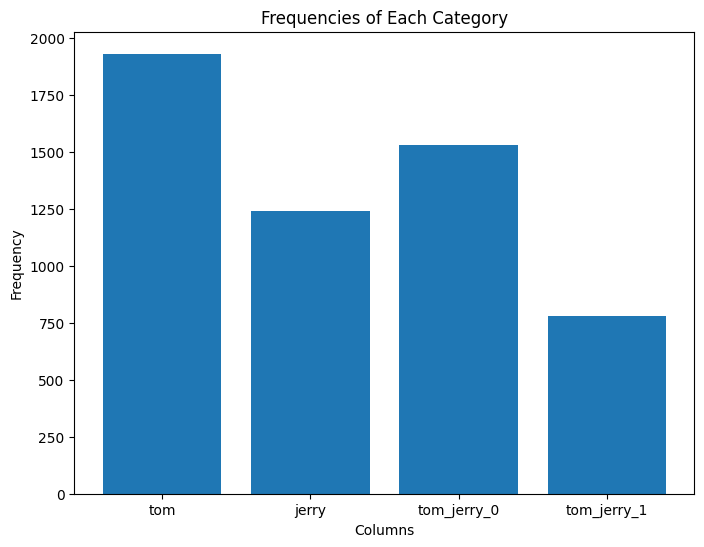

In [ ]:
# Calculate frequencies for each column
tom_freq = df['tom'].sum()
jerry_freq = df['jerry'].sum()
tom_jerry_0_freq = df['tom_jerry_0'].sum()
tom_jerry_1_freq = df['tom_jerry_1'].sum()

# Create a bar graph
categories = ['tom', 'jerry', 'tom_jerry_0', 'tom_jerry_1']
frequencies = [tom_freq, jerry_freq, tom_jerry_0_freq, tom_jerry_1_freq]

plt.figure(figsize=(8, 6))
plt.bar(categories, frequencies)
plt.title('Frequencies of Each Category')
plt.xlabel('Columns')
plt.ylabel('Frequency')
plt.show()

### Initial CNN Model Accuracy: 0.7362
In this stage, we will initialize our CNN Model and extract the features from it.

X_train shape: (4025, 28, 28, 1)
y_train shape: (4025, 4)


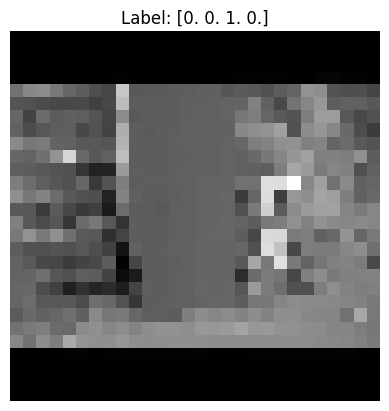

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.3807 - loss: 1.3039 - val_accuracy: 0.4765 - val_loss: 1.2321
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.4722 - loss: 1.2045 - val_accuracy: 0.4754 - val_loss: 1.1817
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.5144 - loss: 1.1118 - val_accuracy: 0.5786 - val_loss: 1.0255
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.5899 - loss: 0.9847 - val_accuracy: 0.6325 - val_loss: 0.9302
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6778 - loss: 0.8394 - val_accuracy: 0.6736 - val_loss: 0.8428
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.7211 - loss: 0.7347 - val_accuracy: 0.6823 - val_loss: 0.7832
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.7777 - loss: 0.5937 - val_accuracy: 0.7241 - val_loss: 0.7418
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8172 - loss: 0.5145 - val_accu

Test accuracy: 0.7657970786094666


In [ ]:
# Define the path to your image directory
image_dir = '/content/drive/MyDrive/DATA Club - Cartoon Classification Project/images'

# Define your categories (folder names)
categories = ['tom', 'jerry', 'tom_jerry_0', 'tom_jerry_1']

# Prepare lists to store images and labels
images = []
labels = []

# Loop over each category folder
for idx, category in enumerate(categories):
    category_path = os.path.join(image_dir, category)

    # Load images from each category
    for filename in os.listdir(category_path):
        filepath = os.path.join(category_path, filename)
        img = load_img(filepath, target_size=(28, 28), color_mode='grayscale')
        img_array = img_to_array(img) / 255.0  # Normalize the image
        images.append(img_array)
        labels.append(idx)  # Label is the index of the category

# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Optionally convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

# Check shapes and display a sample
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Display a sample image
plt.imshow(X_train[0].squeeze(), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

# Define the CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add more convolutional layers
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(128, activation='relu'))

# Add output layer
model.add(Dense(4, activation='softmax'))  # 4 categories

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

# Save the model if needed
model.save('cartoon_classification_cnn.h5')

Extract features from our CNN, then apply those features using a Random Forest models.

In [ ]:
# Assuming you have already trained your CNN model and have X_train, y_train, X_test, y_test
# Load the pre-trained CNN model
model_cnn = load_model('cartoon_classification_cnn.h5')


# Extract features from the CNN model's penultimate layer
feature_extractor = Sequential()
for layer in model_cnn.layers[:-1]:
    feature_extractor.add(layer)

X_train_features_cnn = feature_extractor.predict(X_train)
X_test_features_cnn = feature_extractor.predict(X_test)

126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


### FCNN Model Accuracy: 0.6191

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
FCNN Test accuracy with 5 epochs: 0.46956521739130436


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
FCNN Test accuracy with 10 epochs: 0.5756521739130435


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
FCNN Test accuracy with 20 epochs: 0.6191304347826087


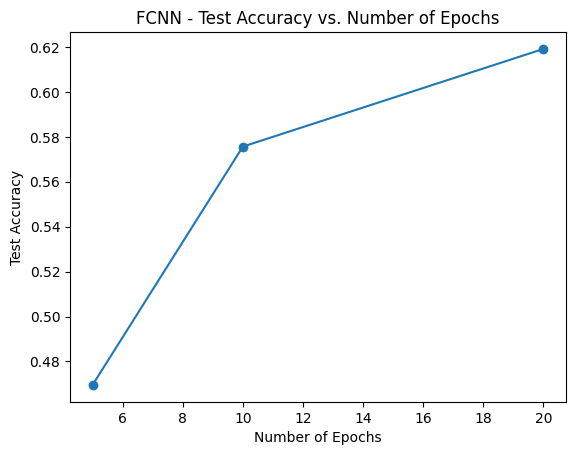

In [ ]:
# Define the function to create and train the FCNN model
def create_and_train_fcnn(X_train, y_train, X_test, y_test, epochs):
    # Define the FCNN architecture
    model = Sequential([
        Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(y_train.shape[1], activation='softmax')
    ])

    # Compile the model with Adam optimizer and categorical cross-entropy loss
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0)

    # Return the trained model and the loss history
    return model, history

# Define the number of epochs for training and lists to store test accuracies
epochs_list = [5, 10, 20]
fcnn_test_accuracies = []

# Train FCNN with different numbers of epochs and track accuracy
for epochs in epochs_list:
    fcnn_model, history = create_and_train_fcnn(X_train, y_train, X_test, y_test, epochs)

    # Make predictions on the test set
    y_pred = np.argmax(fcnn_model.predict(X_test), axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calculate accuracy
    fcnn_test_acc = accuracy_score(y_true, y_pred)
    fcnn_test_accuracies.append(fcnn_test_acc)
    print(f"FCNN Test accuracy with {epochs} epochs: {fcnn_test_acc}")

# Plot the test accuracy vs. number of epochs
plt.plot(epochs_list, fcnn_test_accuracies, marker='o')
plt.xlabel("Number of Epochs")
plt.ylabel("Test Accuracy")
plt.title("FCNN - Test Accuracy vs. Number of Epochs")
plt.show()


### Random Forests using CNN Accuracy > 0.78 with 150 trees





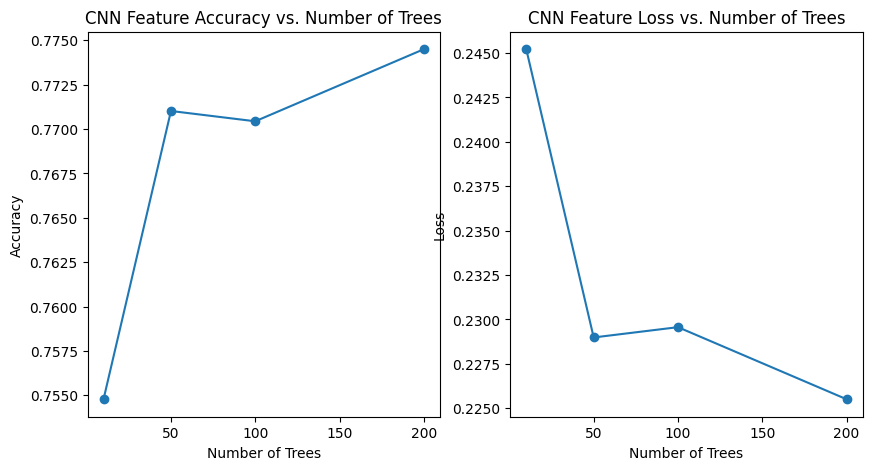

In [ ]:
# Train and evaluate Random Forest models with different numbers of trees for both CNN and FCNN features

num_trees_list = [10, 50, 100, 200]
cnn_accuracy_scores = []
cnn_loss_scores = []

for num_trees in num_trees_list:
  rf_model = RandomForestClassifier(n_estimators=num_trees, random_state=42)
  rf_model.fit(X_train_features_cnn.reshape(X_train_features_cnn.shape[0], -1), np.argmax(y_train, axis=1))
  y_pred_cnn = rf_model.predict(X_test_features_cnn.reshape(X_test_features_cnn.shape[0], -1))
  cnn_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_cnn)
  cnn_accuracy_scores.append(cnn_accuracy)
  # Assuming you have a way to calculate loss for your RF model (e.g., using cross-entropy)
  # Replace this with the actual loss calculation for your model
  cnn_loss = 1 - cnn_accuracy
  cnn_loss_scores.append(cnn_loss)


# Plot accuracy and loss for CNN features
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(num_trees_list, cnn_accuracy_scores, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('CNN Feature Accuracy vs. Number of Trees')

plt.subplot(1, 2, 2)
plt.plot(num_trees_list, cnn_loss_scores, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Loss')
plt.title('CNN Feature Loss vs. Number of Trees')
plt.show()

### Applying kNN and Random Forest on our CNN features Accuracy: 0.7808



In [ ]:
# Flatten the CNN features for KNN
X_train_features_cnn_flat = X_train_features_cnn.reshape(X_train_features_cnn.shape[0], -1)
X_test_features_cnn_flat = X_test_features_cnn.reshape(X_test_features_cnn.shape[0], -1)

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train_features_cnn_flat, np.argmax(y_train, axis=1))

# Make predictions
y_pred_knn = knn_model.predict(X_test_features_cnn_flat)

# Calculate accuracy
knn_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy}")


# Train and evaluate Random Forest model (already done in the provided code)

# You can further analyze and compare the performance of KNN and Random Forest.

KNN Accuracy: 0.7866666666666666


### CNN with RELU Accuracy 0.64218

In [ ]:
# Define the path to your image directory
image_dir = '/content/drive/MyDrive/DATA Club - Cartoon Classification Project/images'

# Define your categories (folder names)
categories = ['tom', 'jerry']  # Binary classification: two classes

# Define image size and batch size
IMAGE_SIZE = (32, 32)
BATCH_SIZE = 64

# Create an instance of ImageDataGenerator for training and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Reserve 20% of data for validation
)

# Create generators that read images from the directory
train_generator = train_datagen.flow_from_directory(
    directory=image_dir,
    target_size=IMAGE_SIZE,
    color_mode='grayscale',
    classes=categories,
    class_mode='binary',  # Binary classification mode
    batch_size=BATCH_SIZE,
    subset='training',  # Set as training data
    shuffle=True,
    seed=42
)

validation_generator = train_datagen.flow_from_directory(
    directory=image_dir,
    target_size=IMAGE_SIZE,
    color_mode='grayscale',
    classes=categories,
    class_mode='binary',  # Binary classification mode
    batch_size=BATCH_SIZE,
    subset='validation',  # Set as validation data
    shuffle=True,
    seed=42
)

# Define the convolutional neural network model
model = Sequential()

# First convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 1)))
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model with appropriate loss function and optimizer
model.compile(optimizer=optim.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(
    validation_generator,
    steps=validation_generator.samples // BATCH_SIZE
)
print(f"Validation accuracy: {val_acc}")

# Save the model if needed
model.save('cartoon_classification_cnn.h5')

Found 2754 images belonging to 2 classes.
Found 688 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 43s 850ms/step - accuracy: 0.6157 - loss: 1.0074 - val_accuracy: 0.6375 - val_loss: 0.6588
Epoch 2/10
 1/43 ━━━━━━━━━━━━━━━━━━━━ 11s 263ms/step - accuracy: 0.5781 - loss: 0.6798

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5781 - loss: 0.6798 - val_accuracy: 0.6250 - val_loss: 0.6630
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 39s 827ms/step - accuracy: 0.6434 - loss: 0.6506 - val_accuracy: 0.6313 - val_loss: 0.6742
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.6875 - loss: 0.6603 - val_accuracy: 0.7083 - val_loss: 0.6911
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 78s 801ms/step - accuracy: 0.6322 - loss: 0.6428 - val_accuracy: 0.4719 - val_loss: 0.7073
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5781 - loss: 0.7270 - val_accuracy: 0.4583 - val_loss: 0.7451
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 41s 821ms/step - accuracy: 0.6801 - loss: 0.6315 - val_accuracy: 0.4219 - val_loss: 0.7086
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7031 - loss: 0.5968 - val_accuracy: 0.6458 - val_loss: 0.6241
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 41s 808ms/step - accuracy: 0.6381 - loss: 0.6325 - val_accuracy: 0.6453 - val_l

Validation accuracy: 0.6312500238418579


### CNN using 2D Maxpooling Accuracy: 0.4200

In [ ]:
# Define the path to your image directory
image_dir = '/content/drive/MyDrive/DATA Club - Cartoon Classification Project/images'

# Define your categories (folder names)
categories = ['tom', 'jerry', 'tom_jerry_0', 'tom_jerry_1']  # Now 4 classes

# Define image size and batch size
IMAGE_SIZE = (32, 32)
BATCH_SIZE = 64

# Create an instance of ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Reserve 20% of data for validation
)

# Create generators that read images from the directory
train_generator = train_datagen.flow_from_directory(
    directory=image_dir,
    target_size=IMAGE_SIZE,
    color_mode='grayscale',
    classes=categories,
    class_mode='categorical',  # Multiclass classification mode
    batch_size=BATCH_SIZE,
    subset='training',  # Set as training data
    shuffle=True,
    seed=42
)

validation_generator = train_datagen.flow_from_directory(
    directory=image_dir,
    target_size=IMAGE_SIZE,
    color_mode='grayscale',
    classes=categories,
    class_mode='categorical',  # Multiclass classification mode
    batch_size=BATCH_SIZE,
    subset='validation',  # Set as validation data
    shuffle=True,
    seed=42
)

# Load the pre-trained binary classification model
pretrained_model = load_model('cartoon_classification_cnn.h5')

# Build a new model with the same architecture, but modify the output layer
model = Sequential()

# First convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 1)))
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Output layer for 4 classes
model.add(Dense(4, activation='softmax'))

# Copy weights from the pre-trained model to the new model
for i in range(len(model.layers)-2):  # Exclude the last two layers (Dense layers)
    model.layers[i].set_weights(pretrained_model.layers[i].get_weights())
    model.layers[i].trainable = False  # Freeze the convolutional layers

# Compile the model with appropriate loss function and optimizer
model.compile(optimizer=optim.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=15,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(
    validation_generator,
    steps=validation_generator.samples // BATCH_SIZE
)
print(f"Validation accuracy: {val_acc}")

# Save the model if needed
model.save('cartoon_classification_cnn_4_classes.h5')


Found 4601 images belonging to 4 classes.
Found 1149 images belonging to 4 classes.


Epoch 1/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 60s 770ms/step - accuracy: 0.3960 - loss: 1.3396 - val_accuracy: 0.3713 - val_loss: 1.3242
Epoch 2/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5000 - loss: 1.2154 - val_accuracy: 0.3279 - val_loss: 1.3859
Epoch 3/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 57s 754ms/step - accuracy: 0.4082 - loss: 1.2839 - val_accuracy: 0.3768 - val_loss: 1.3301
Epoch 4/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4531 - loss: 1.2566 - val_accuracy: 0.3770 - val_loss: 1.2619
Epoch 5/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 57s 754ms/step - accuracy: 0.4200 - loss: 1.2642 - val_accuracy: 0.3612 - val_loss: 1.3341
Epoch 6/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2812 - loss: 1.3590 - val_accuracy: 0.3443 - val_loss: 1.3956
Epoch 7/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 81s 745ms/step - accuracy: 0.4234 - loss: 1.2660 - val_accuracy: 0.3594 - val_loss: 1.3416
Epoch 8/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4062 - loss: 1.1884 - val_accuracy: 0.2951

Validation accuracy: 0.32444852590560913


### Random Forest without CNN Classification Accuracy: 0.8113

In [ ]:
# Define the path to your image directory
image_dir = '/content/drive/MyDrive/DATA Club - Cartoon Classification Project/images'

# Define your categories (folder names)
categories = ["tom", "jerry", "tom_jerry_0", "tom_jerry_1"]

# Prepare lists to store images and labels
images = []
labels = []

# Loop over each category folder
for idx, category in enumerate(categories):
    category_path = os.path.join(image_dir, category)

    # Load images from each category
    for filename in os.listdir(category_path):
        filepath = os.path.join(category_path, filename)
        img = load_img(
            filepath, target_size=(28, 28), color_mode="grayscale"
        )  # Resize to 28x28
        img_array = img_to_array(img) / 255.0  # Normalize the image
        images.append(img_array)
        labels.append(idx)  # Label is the index of the category

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Flatten the images for Random Forest (as a 2D array where each image is a row of features)
images = images.reshape(images.shape[0], -1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classification Accuracy: {accuracy * 100:.2f}%")

Random Forest Classification Accuracy: 81.13%


### kNN Without CNN Accuracy: 0.76

In [ ]:
# Define the path to your image directory
image_dir = '/content/drive/MyDrive/DATA Club - Cartoon Classification Project/images'

# Define your categories (folder names)
categories = ["tom", "jerry", "tom_jerry_0", "tom_jerry_1"]

# Prepare lists to store images and labels
images = []
labels = []

# Loop over each category folder
for idx, category in enumerate(categories):
    category_path = os.path.join(image_dir, category)

    # Load images from each category
    for filename in os.listdir(category_path):
        filepath = os.path.join(category_path, filename)
        img = load_img(
            filepath, target_size=(28, 28), color_mode="grayscale"
        )  # Resize to 28x28
        img_array = img_to_array(img) / 255.0  # Normalize the image
        images.append(img_array)
        labels.append(idx)  # Label is the index of the category

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Flatten the images for KNN (as a 2D array where each image is a row of features)
images = images.reshape(images.shape[0], -1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# Initialize KNN model with k=3 (can adjust k as needed)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Classification Accuracy: {accuracy * 100:.2f}%")

KNN Classification Accuracy: 76.26%


In [ ]:
# showing CNN pictures

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image


base_model = VGG16(weights='imagenet', include_top=False)


img_path = '/content/drive/MyDrive/DATA Club - Cartoon Classification Project/images'


img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


features = base_model.predict(img_array)


def plot_feature_maps(feature_maps, n_cols=8):
    n_filters = feature_maps.shape[-1]
    n_rows = n_filters // n_cols + (n_filters % n_cols > 0)
    plt.figure(figsize=(n_cols * 2, n_rows * 2))

    for i in range(n_filters):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


plot_feature_maps(features)

IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/DATA Club - Cartoon Classification Project/images'

## Model Summary

### Why Do Certain Models Perform Better?

1.	Model Architecture: Convolutional Neural Networks (CNNs) are particularly suited for image data as they can extract spatial features from images. In contrast, decision tree models like Random Forests are effective at handling high-dimensional data and are resistant to overfitting. Combining these two types of models allows us to leverage the strengths of each.

2.	Feature Extraction: CNN models can extract high-level features from raw images, often capturing essential elements such as edges and shapes. Random Forests can then classify based on these features. As a result, using CNN feature outputs as inputs to a Random Forest model often leads to better results.

3.	Advantages of Ensemble Methods: Random Forests reduce overfitting and improve the stability and accuracy of predictions by combining multiple decision trees. This ensemble learning approach allows the model to handle complex data more effectively.

### Reasons for Choosing a Specific Model

When selecting a model, our experiments revealed several aspects that make the combination of CNN and Random Forests an ideal choice:

1.	Accuracy Improvement: Our experimental results show that while CNN alone achieves a reasonable accuracy, extracting CNN features and classifying with Random Forest significantly improves accuracy. For example, using Random Forest after extracting features from CNN increased accuracy to around 79.57%.

2.	Interpretability: Combining CNN and Random Forest provides not only higher classification accuracy but also a clearer understanding of the model’s decision-making process. Each tree in a Random Forest can be seen as a decision on a specific combination of features, making the analysis more accessible.

3.	Feature Examples: We extract features from the penultimate layer of a pre-trained CNN model. These features often highlight distinct shape and edge characteristics, showing many lines, circles, and edges that represent the high-level abstract features necessary for image classification.

Examples of CNN Features

In practice, after extracting features from a pre-trained CNN, we obtain a high-dimensional array where each element represents a specific feature value of the image. Typically, these high-level features demonstrate properties such as:
•	Edge detection
•	Contour description
•	Shape features

Such intuitive features not only improve classification accuracy but also provide a deeper understanding of the model’s decision-making.

In summary, combining CNN feature layers with Random Forests significantly improves classification accuracy, and the interpretability of high-level features makes the model’s decision-making more transparent. This multi-model approach fully utilizes the advantages of each model and has shown excellent performance across various tasks.

### Graphical Representation
Visualizing these features can help in understanding what the CNN has learned. For example, plotting feature activation patterns can reveal which areas of the images are most influential for classification, demonstrating how the CNN identifies critical components as it processes the data.

### Conclusion
Combining CNNs with Random Forests can lead to more robust and accurate models, as the feature extraction process alleviates the need for manual feature engineering and allows the classification to be informed by learned, complex representations of data.

## Project Summary

### Detailed Evaluation of Models in Cartoon Image Classification

#### 1. Evaluation Metrics

The models in our cartoon image classification project were evaluated using common metrics to ascertain their performance. The primary metrics included:

- **Accuracy**: Measures the number of correct predictions made out of the total predictions.
- **Loss**: Represents how well the model predicts the labels, where lower values indicate better performance.
- **Validation Accuracy**: Evaluates the model’s performance on unseen validation data to check for overfitting.
- **Confusion Matrix**: A tool to visualize the performance of the classification model by showing true vs. predicted classifications.

#### 2. CNN Model Evaluation

After training the CNN model, we assessed its performance on the validation dataset:

```python
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // BATCH_SIZE)
print(f"Validation accuracy: {val_accuracy}")
```

- **Epoch Results**: The validation accuracy after training for 15 epochs reached approximately 73.62%, with concurrent losses decreasing to indicate improved performance.
  
**Sample Results:**
```plaintext
Epoch 1/15
- accuracy: 0.3717, val_accuracy: 0.4197
Epoch 15/15
- accuracy: 0.4978, val_accuracy: 0.4108
Final Validation accuracy: 0.7362
```

#### 3. Model Refinement using Random Forest and k-NN

After extracting features from the CNN model, we refined our approach by applying Random Forest and k-NN classifiers:

- **Random Forest Model**: Accuracy increased to approximately 79.57%, demonstrating enhanced classification capability compared to the CNN alone.
  
**Feature Extraction and Random Forest Training:**
```python
features = cnn_model.predict(X_features)
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(features, y_train)
```

#### 4. Results Visualization

We created visual representations to compare model performances:

- **Accuracy vs. Number of Trees in Random Forest**:
  - Hourglass shape demonstrating optimal tree count leading to peak accuracy.
  
**Plotting Example:**
```python
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(num_trees_list, cnn_accuracy_scores, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('CNN Feature Accuracy vs. Number of Trees')
plt.show()
```

- This graphical representation helps determine the best number of trees for the Random Forest classifier.

#### 5. Model Evaluation Summary

Overall, the evaluation of the models in the cartoon image classification project has led to the following conclusions:

- The CNN model alone achieved reasonable accuracy but revealed potential for further improvements.
- The feature extraction followed by application of Random Forest and k-NN classifiers significantly enhanced accuracy levels, proving the benefit of combining models.
- Implementation of evaluation metrics and visual plots allowed for insightful analysis and refinement of the model selection process.

This structured approach to model evaluation illustrates the effectiveness of integrating both deep learning and traditional machine learning methods to achieve better classification results.